# Best Markets For Tech Education Advertisments

This project is about finding the optimal market or country to spend the majority of a e-learning company's advertisment budget based on the density of learning in a respective country as well as the amount of money on average each student spends on his or her education. 

We will achieve this goal, using pandas and visualizations to back up our reasoning on which country is the best to adverise in.

# Data Exploratory

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
print(df.shape)
print(df.info())
print(df.head(5))
print(df.describe())



(18175, 136)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB
None
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 

In [4]:
print(df.columns)

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)


We are exploring a ready-made data set instead of organizing a survey because of the high cost of conducting a large scale survey. The large financial resources needed to conduct a good survey is cost prohibitive and therefore it is a good practice to explore more cost friendly methods. 

In this project we will be exploring data from FreeCodeCamp which offers free e-learning through a web platform and because they run a very well known Medium publication their survey consists of many new coders with varying interests who are interested in learning more in tech fields involving coding.

The survey data can by downloaded from Github https://github.com/freeCodeCamp/2017-new-coder-survey.

Before proceeding with answering the important questions, such as which country has the most students and which country has the highest gross in education spending, we need to ensure that the sample from the survey is representative of our population of interest.

In [5]:
df['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                              11.770595
  Front-End Web Developer                                                                                                                                                                              6.435927
  Data Scientist                                                                                                                                                                                       2.173913
Back-End Web Developer                                                                                                                                                                                 2.030892
  Mobile Developer                                                                                                                                                      

Based on the data:
- Most of the sample are interested in Full-Stack Web Developers.
- A majority of sample are interested in more than one field. 
- A very few are interested in mobile development.

Since there are alot of people interested in multiple fields it would be interesting to know more precisely how much of our sample are focused on one field as opposed to a variety.
Consequently, in the next code block, we'll:

    -Split each string in the JobRoleInterest column to find the number of options for each participant.
    -We'll first drop the null values because we can't split Nan values.
    -Generate a frequency table for the variable describing the number of options.

In [6]:
#split each string from the series with no null values
no_nulls = df['JobRoleInterest'].dropna()
split = no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_options = split.apply(lambda x:len(x))
n_options.value_counts(normalize=True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

Based on the frequency table we can observe that 31.65% of the sampled survey are primarily focused on just one role whilst the remaining sample are interested in 3 or more various roles. This may be a good sign for a education based company because there is a higher chance that after a student completes their education pathway subscription in a specific field they will re-enlist or resubscribe to learn more in a different field. 

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [7]:
web_or_mobile = no_nulls.str.contains('Mobile Developer|Web Developer')
web_or_mobile_counts = web_or_mobile.value_counts(normalize=True)*100
print(web_or_mobile_counts)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


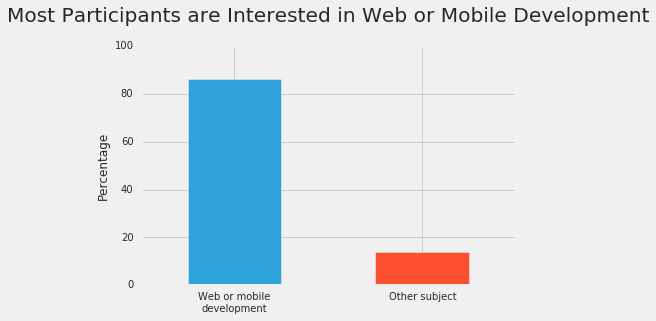

In [8]:
#generate a graph to show the percentage of the sample interested in web or mobile development
%matplotlib inline
plt.style.use('fivethirtyeight')

web_or_mobile_counts.plot.bar()
plt.title('Most Participants are Interested in Web or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

As you can see there is a good amount of the sample that have interests in either web development or mobile development or both. Which is a strong indicator that the sample is infact representative of a population we want to base our research on.

Now that we have a representative population we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

    -Where are these new coders located.
    -What are the locations with the greatest number of new coders.
    -How much money new coders are willing to spend on learning.


# Where Are Our Learners?

In [9]:
# Isolate the participants that answered what role they'd be interested in
valid_party = df[df['JobRoleInterest'].notnull()].copy()

country_freq = valid_party['CountryLive'].dropna().value_counts(normalize=True)*100
print(pd.DataFrame({"Country Frequencies":country_freq}))

                               Country Frequencies
United States of America                 45.700497
India                                     7.721556
United Kingdom                            4.606610
Canada                                    3.802281
Poland                                    1.915765
Brazil                                    1.886517
Germany                                   1.828020
Australia                                 1.637906
Russia                                    1.491664
Ukraine                                   1.301550
Nigeria                                   1.228429
Spain                                     1.126060
France                                    1.096812
Romania                                   1.038315
Netherlands (Holland, Europe)             0.950570
Italy                                     0.906698
Philippines                               0.760456
Serbia                                    0.760456
Greece                         

From the results we see that United States and India represent nearly half of the sample of those who are interested in learning coding. Given that the program is geared towards primary English learners it would also be intuitive to include the United Kingdom and Canada into the list of target countries.

# Who Spends the Most?


From the list of the target countries, we will now extrapolate information to answer the question of which country has the highest money spent per month on education. To do this we will look at the MoneyForLearning column, whcih describes how much the participants have spent from the time they started learning how to code to the point that they have completed the survey.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.
Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the MoneyForLearning column to the MonthsProgramming column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.

In [10]:
# Replace 0s with 1s to avoid division by 0
valid_party['MonthsProgramming'].replace(0,1, inplace=True)

# New column for the amount of money each student spends each month
valid_party['edu_money_per_month'] = valid_party['MoneyForLearning'] / valid_party['MonthsProgramming']
valid_party['edu_money_per_month'].isnull().sum()



675

Let's keep only the rows that don't have null values for the Country_Live and education_budget_per_month columns.


In [11]:
#Remove the rows with null values in money_per_month
valid_party = valid_party[valid_party['edu_money_per_month'].notnull()]

# Remove the rows with null values in 'CountryLive'
valid_party = valid_party[valid_party['CountryLive'].notnull()]

# Frequency table to check if we still have enough data
print(valid_party['CountryLive'].value_counts().head())


United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64


In [12]:
#Mean sum of money spent by students each month
countries_mean = valid_party.groupby('CountryLive').mean()
countries_mean['edu_money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: edu_money_per_month, dtype: float64

The results show that those who completed to survey, most of the money spent on education came from the United States, followed second by India, then Canada, followed last by the United Kingdom. 

This might be indicative of India growing into a technological powerhouse and a key industry leader in the future for tech growth and employment. 

To ensure that our data is not being effected by outliers, it would be wise to observe and remove any outliers so that our observations are more accurate.

# Dealing with Extreme Outliers

In [13]:
# Isolate only the countries of interest
four_countries = valid_party[valid_party['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



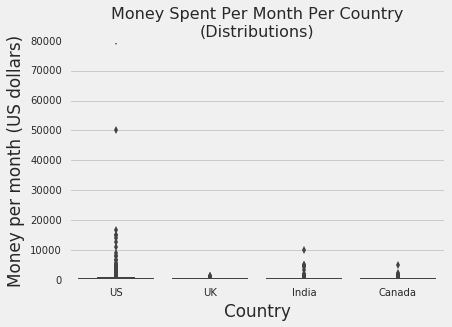

In [14]:
# Box plots to visualize distributions

sns.boxplot(x='CountryLive', y='edu_money_per_month', data=four_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


In the chart there appears to be only a few instances of outliers within the countries. In the US there are a few extreme outliers; two instances of over 50000 per month spent which is most likely input error. In indian there are also one instance in which someone has put the amount spent above 10000$ which is considerably higher than the mean spent by students in India.

To fix the outliers we will first cap the money spent per month at 20000$, then recalculate the means and rechart the distributions.

In [15]:
valid_party = valid_party[valid_party['edu_money_per_month']<20000]
countries_mean = valid_party.groupby('CountryLive').mean()
countries_mean['edu_money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]



CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: edu_money_per_month, dtype: float64

We can see that the average money spent has been reduced for the United States after we dropped the extreme outlier, giving us a more accurate account of how much a student spends in the US on average per month.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



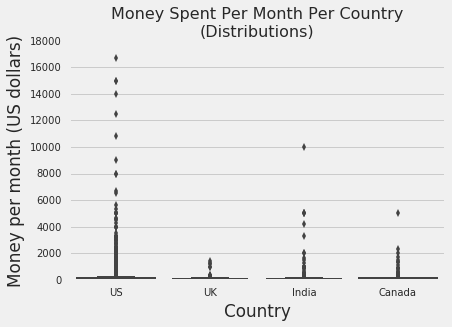

In [16]:
four_countries = valid_party[valid_party['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(x='CountryLive', y='edu_money_per_month', data=four_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

After removing the extreme outliers from the US, there still appears to be some outliers from the four respective countries. One possible reason for the extreme cost spent by the particpants could be if they have enrolled into several costly bootcamps in conjuction with a masters program. 

To explain why these participants spent so much money we will explore how many bootcamps these particular outliers have attended. And in the occasion that they did not attend any bootcamps we will remove these specific outliers from the sampled data.

In [17]:
us_outliers = four_countries[(four_countries['CountryLive']=='United States of America') & (four_countries['edu_money_per_month']>6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,edu_money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


In [18]:
india_outliers = four_countries[(four_countries['CountryLive']=='India')&(four_countries['edu_money_per_month']>2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,edu_money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


Of the 17 outliers in the US and India; 5 from the US and 6 from India reported not attending any bootcamps and while it is possible that they may be enrolled into an expensive graduate program to minimize error we will remove these participants from the sample dataset. 

In [19]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp_US = four_countries[
    (four_countries['CountryLive'] == 'United States of America') & 
    (four_countries['edu_money_per_month'] >= 6000) &
    (four_countries['AttendedBootcamp'] == 0)
]
four_countries = four_countries.drop(no_bootcamp_US.index)

no_bootcamp_India = four_countries[(four_countries['CountryLive']=='India') & 
                                   (four_countries['edu_money_per_month']>2500) & 
                                   (four_countries['AttendedBootcamp']==0)]

four_countries = four_countries.drop(no_bootcamp_India.index)

Lets recalculate the mean and chart the final box plot

In [20]:
four_countries.groupby('CountryLive').mean()['edu_money_per_month']

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    160.532509
Name: edu_money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



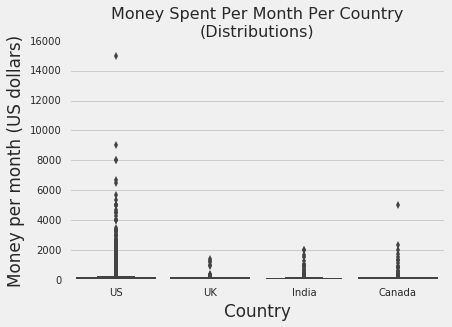

In [21]:
sns.boxplot(x='CountryLive', y='edu_money_per_month', data=four_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [22]:
#number of participants in each of the top 4 countries
four_countries['CountryLive'].value_counts(normalize=True)*100

United States of America    74.987186
India                       11.711943
United Kingdom               7.150179
Canada                       6.150692
Name: CountryLive, dtype: float64

# Choosing the Best Countries to Advertise In


 From the data we've collected it is apparent that the United States should be the primary target as a market to advertise in because of both the amount of participants who are interested in learning about coding as well as the highest average spent by the individuals towards their education($160.53 per month). Based on average education monthly spending alone the next obvious choice to target would be Canada given that they boast the next highest monthly average expenditure on education at $113.51 per month. But on the other hand if you consider that only 6% of all valid participants in the survey is from Canada, it would be wise to consider India which has double the amount of participants as the second best country to invest advertisment funds into. Of the four countries the United Kingdom would be the worse of the choices to invest in given it's low monthly expenditure on education as well as it's lo participation count. At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

60% for the US, 25% for India, 15% for Canada.
50% for the US, 30% for India, 20% for Canada; etc.
Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

70% for the US, and 30% for India.
65% for the US, and 35% for Canada; etc.

Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.












# Conclusion


In this project, we analyzed survey data from new coders to find the best two markets to advertise in. We have conclusively decided that the best market to advertise in would be the United States of America.

For the second best market, with out further exploration of the dataset the decision to decide between India and Canada is not conclusive. Therefore it seems best to send the results to the marketing team so they can utilize their domain knowledge to take the best decision.